# STA410 Week 5 Programming Assignment (5 points)

0. **Paired or individual assignment.** Create code solutions for these assignments either individually or in the context of a paired effort. 

   >  Seek homework partners in class, in course discussion board on piazza, etc.   
 
    
1. **Paired students each separately submit their (common) work, including (agreeing) contribution of work statements for each problem.**  
  
   > Students must work in accordance with the [University of Toronto’s Code of Behaviour on Academic Matters](https://governingcouncil.utoronto.ca/secretariat/policies/code-behaviour-academic-matters-july-1-2019) (and see also http://academicintegrity.utoronto.ca.); however, students working in pairs may share work without restriction within their pair. Getting and sharing "hints" from other classmates is encouraged; but, the eventual code creation work and submission must be your own individual or paired creation.
      
2. **Do not delete, replace, or rearranged cells** as this erases `cell ids` upon which automated code tests are based.

   > The "Edit > Undo Delete Cells" option in the notebook editor might be helpful; otherwise, redownload the notebook (so it has the correct required `cells ids`) and repopulate it with your answers (assuming you don't overwrite them when you redownload the notebook).
  >> ***If you are working in any environment other than*** [UofT JupyterHub](https://jupyter.utoronto.ca/hub/user-redirect/git-pull?repo=https://github.com/pointOfive/sta410hw0&branch=master), [Google Colab](https://colab.research.google.com/github/pointOfive/sta410hw0/blob/master/sta410hw0.ipynb), or [UofT JupyterLab](https://jupyter.utoronto.ca/hub/user-redirect/git-pull?repo=https://github.com/pointOfive/sta410hw0&branch=master&urlpath=/lab/tree/sta410hw0), your system must meet the following versioning requirements 
   >>
   >>   - [notebook format >=4.5](https://github.com/jupyterlab/jupyterlab/issues/9729) 
   >>   - jupyter [notebook](https://jupyter.org/install#jupyter-notebook) version [>=6.2](https://jupyter-notebook.readthedocs.io/en/stable/) for "classic" notebooks served by [jupyterhub](https://jupyterhub.readthedocs.io/en/stable/quickstart.html)
   >>   - [jupyterlab](https://jupyter.org/install) version [>=3.0.13](https://github.com/jupyterlab/jupyterlab/releases/tag/v3.0.13) for "jupyterlab" notebooks  
   >>    
   >> otherwise `cell ids` mat not be supported and you will not get any credit for your submitted homework.
   >>
   >> You may check if `cell ids` are present and working by running the following command in a cell 
   >>
   >> `! grep '"id":' <path/to/notebook>.ipynb`
   >>
   >> and making sure the `cell ids` **do not change** when you save your notebook.
   
3. ***You may add cells for scratch work*** but if required answers are not submitted through the provided cells where the answers are requested your answers may not be marked.

 
4. **No cells may have any runtime errors** because this causes subsequent automated code tests to fail and you will not get marks for tests which fail because of previous runtime errors. 

  > Run time errors include, e.g., unassigned variables, mismatched parentheses, and any code which does not work when the notebook cells are sequentially run, even if it was provided for you as part of the starter code. ***It is best to restart and re-run the cells in your notebook to ensure there are no runtime errors before submitting your work.***
  >
  > - The `try`-`except` block syntax catches runtime errors and transforms them into `exceptions` which will not cause subsequent automated code tests to fail.  


5. **No jupyter shortcut commands** such as `! python script.py 10` or `%%timeit` may be included in the final submission as they will cause subsequent automated code tests to fail.

   > ***Comment out ALL jupyter shortcut commands***, e.g., `# ! python script.py 10` or `# %%timeit` in submitted notebooks.


6. **Python library imports are limited** to only libraries imported in the starter code and the [standard python modules](https://docs.python.org/3/py-modindex.html). Importing additional libraries will cause subsequent automated code tests to fail.

  > Unless a problem instructs differently, you may use any functions available from the libraries imported in the starter code; otherwise, you are expected to create your own Python functionality based on the Python stdlib (standard libary, i.e., base Python and standard Python modules).


7. You are encouraged to adapt code you find available online into your notebook; however, if you do so please provide a link to the utilized resource. ***If failure to cite such references is identified and confirmed, your mark will be immediately reduced to 0.***  

In [3]:
import numpy as np
from numpy.linalg import inv, solve, cholesky, svd, qr
from scipy import stats
import statsmodels.api as sm
from scipy.linalg import solve_triangular
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Problem 0 (required)

Are you working with a partner to complete this assignment?  
- If not, assign  the value of `None` into the variable `Partner`.
- If so, assign the name of the person you worked with into the variable `Partner`.
    - Format the name as `"<First Name> <Last Name>"` as a `str` type, e.g., "Scott Schwartz".

In [ ]:
# Required: only worth points when not completed, in which case, you'll lose points
Partner = #None
# This cell will produce a runtime error until you assign a value to this variable

What was your contribution in completing the code for this assignments problems? Assign one of the following into each of the `Problem_X` variables below.

- `"I worked alone"`
- `"I contributed more than my partner"`
- `"My partner and I contributed equally"`
- `"I contributed less than my partner"`
- `"I did not contribute"`

In [ ]:
# Required: only worth points when not completed, in which case, you'll lose points
Problem_1 = #"I worked alone"
Problem_2 = #"I worked alone"
# This cell will produce a runtime error until you assign a value to this variable

# Problem 1 (5 points)

***Randomized SVD*** addresses the $X_{n\times p} = U_{n \times p}D_{p \times p}V^T_{p \times p} = U_{n \times r}D_{r \times r}V^T_{p \times r}$ decomposition when $n$ and $p$ together are prohibitively large, but $r<<p$.

- The ***SVD*** of an $n \times p$ matrix has complexity $O(n\times p \times \min(n, p))$
- The ***QR decomposition*** of an $n \times p$ matrix also has complexity $O(n\times p \times \min(n, p))$

The ***Randomized SVD*** works as follows.
1. A random matrix $P_{p\times r}$ is generated
2. $Z_{n\times r} = X_{n\times p}P_{p\times r}$ is computed, which randomly samples the column space of $X$
3. The ***QR decomposition*** $Z_{n\times r}=Q_{n\times r}R_{r\times r}$ is computed

   So $Q$ is an ***orthogonal basis*** for $Z$, and also for $X$ since $\text{rank}(X)=r$
   
   
4. $X$ is now projected onto the ***orthogonal directions*** $Q$ as $Y_{r \times p}=Q^TX$
5. The ***SVD*** $Y_{r \times p} = \underset{r \times r}{U_Y} \underset{r \times r}{D_Y} \underset{r \times p}{V_Y^T}$ is then computed

   > and it can be seen that for the original $U_{n \times r}D_{r \times r}V^T_{p \times r} = X_{n\times p}$ ***SVD*** 
   > - $D_Y\approx D_{r \times r}$
   > - columns $[Q_{n \times r} U_Y{}_{r \times p}]_{\cdot j} \approx \pm[U_{n \times p}]_{\cdot j}$
   > - columns $[\underset{p \times r}{V_Y{}}]_{\cdot j} \approx \pm[V_{p \times p}]_{\cdot j}$ for $j=1,\cdots,r$
   >
   > such that, finally
   
6. $X \approx Q U_Y D_Y V_Y^T$ which required computations based on $Z_{n\times r}$ and $Y_{r \times p}$  instead of $X_{n\times p}$ when $r << p$

   so long as the column space of $Z$ is representative of the column space of $X$, which the random project matrix $P_{p\times r}$ can guarantee for sufficiently large $r$ in large $X_{n \times p}$ contexts.


In the end this is simply seen to be projecting $X$ into a lower dimensional space which can accurately represent $X$ using $Q^T$, performing the desired computations in that lower dimensional space (where they're less expensive), and the projecting the result back out to the original space with $Q$.

***Hints:*** 

- ***Randomized SVD*** is a technique that comes from the emerging framework of ***Randomized linear algrebra*** which is based on leveraging "central limit"-like properties of random matrices (like $P$ here); but, you can look into this topic further at a later time if you're interested. For now, your task is the implement the methology described above, so stay focussed on doing just that.

- That said, you may find it helpful to review another presentation of this material just to gain some additional comfort about generally what's going on as you begin diving into this problem. Here's a [13-minute youtube video](https://www.youtube.com/watch?v=fJ2EyvR85ro) presenting ***Randomized SVD*** upon which this problem is based. **Please mute your computer or use headphones if you play the video;** *and, don't forget about 1.5x and 2x video speeds to make your review of the video extra efficient.*

## Problem 1 Questions 0-2 (1.75 points)

0. (0.25 points) Use `np.mean` and `np.std` (both with default values) to center and scale the columns of `X` 

    ```python
X = sm.datasets.get_rdataset("mtcars").data.values
    ```

    so that they have *mean* $0$ and *standard deviation* $1$ and assign this result to the variable `Xtilde`.
    
    ***WARNING:*** `_Xtilde = (_X - np.mean(_X))/np.std(_X)` ***DOES NOT*** accomplish this. Adjusting the above to include the `axis` parameter of `np.mean` and `np.std` with an appropriate setting would produce the correct result.
    

1. (0.5 points) Consider the ***condition number*** of `X` and `Xtilde` with `np.linalg.cond` and then use the imported `svd` function to visually compare the ***singular values*** of the ***SVD*** of `X` and `Xtilde` using `plt.plot(np.log(D),'.')` where  `D` is the `np.array` (one dimensional vector) of ***singular values*** returned by the `svd` function. Which of the following most accurately describes this comparison?

    1. `X` has a better ***condition number*** than `Xtilde` because `X` has a more extreme/outlying ***singular value*** meaning centering and scaling isn't beneficial
    2. `X` has a better ***condition number*** than `Xtilde` because `Xtilde` has a more extreme/outlying ***singular value*** meaning centering and scaling isn't beneficial
    3. `X` has a worse ***condition number*** than `Xtilde` because `X` has a more extreme/outlying ***singular value*** meaning centering and scaling is beneficial
    4. `X` has a worse ***condition number*** than `Xtilde` because `Xtilde` has a more extreme/outlying ***singular value*** meaning centering and scaling is beneficial
    

2. For the random `P` matrix below, complete steps 2-6 of the ***Randomized SVD*** procedure

    ```python
p,r = Xtilde.shape[1],5
np.random.seed(10)
P = stats.norm().rvs(size=(p,r))
    ```

    and assign the intermediate variables of the procedure to the corresponding variables `Z` (0.25 points), `Q` and `R` (0.25 points), `Y` (0.25 points), `U_Y`, `D_Y`, and `Vt_Y` (0.25 points).
    
***Hints:***
- The first problem of centering and scaling the data is very important since all subsequent calculations depend on this being done correctly!
- The `D` above is considered to be a one dimensional vector `np.array` which is what the `svd` function returns by default.
- The same is generally true of `D_Y`; so, when actually computing the matrix multiplication steps you can convert this to a (two dimensional `np.array`) matrix using `np.diag(D_Y)`; or, you can use the broadcasting formulation of the necessary multiplications as has been emphasized in course homework. When assigning the `D_Y` object it may be saved as either the default one dimensional vector `np.array` format, or the two dimensional `np.array` matrix format.  The autotester will check the `shape` first to determine which format these are stored in, and then test them based on that.
- Be mindful of the `full_matrices=[True|False]` argument of the `svd` function so that the dimension of the returned matrices is as prescribed by the ***Randomized SVD*** procedure.

In [ ]:
X = #
U,D,V = #

# 0.25 points [format: same shape as `X` but with mean 0 and standard deviation 1 columns]
Xtilde = #

U_Xtilde,D_Xtilde,V_Xtilde = #
# etc.

# 0.5 points [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p1q1 = #<"A"|"B"|"C"|"D"> 
# Uncomment the above and keep each only either "A" or "B" or "C" or "D"

# This cell will produce a runtime error until all variables are assigned values!

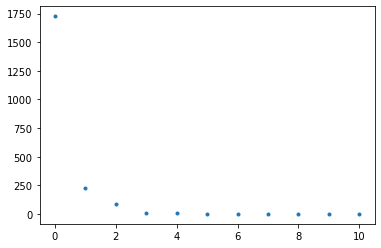

In [167]:
plt.plot(D,'.')

# Any used `D` variable must have been assigned a value to avoid a run time error!

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just do not leave in a state that will produce a runtime errors when notebook cells are run sequentially.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted.

# None of this will not cause problems with `cell ids` assuming your versioning supports `cell ids`
# (as UofT JupyterHub, UofT JupyterLab, an Google Colab will).


In [ ]:
# Cell for scratch work


In [ ]:
# 0.25 points each [format: matrix operations or results form appropriate function al calls]
Z = #
Q, R = # 
Y = #
U_Y, D_Y, Vt_Y = #

# All variables must be assigned values to avoid run time errors!

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just do not leave in a state that will produce a runtime errors when notebook cells are run sequentially.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted.

# None of this will not cause problems with `cell ids` assuming your versioning supports `cell ids`
# (as UofT JupyterHub, UofT JupyterLab, an Google Colab will).


In [1]:
# Cell for scratch work


## Problem 1 Question 3 (0.5 points)

The figures below can be used to see how well the ***Randomized SVD*** procedure can recover `X` and the ***singular values*** for 

```python
p,r = Xtilde.shape[1],5
np.random.seed(10)
P = stats.norm().rvs(size=(p,r))
```

3. (0.25 points) Which of the following is the smallest ratio of `r` to `p` for which `np.abs(Xtilde-((Q@U_Y)*D_Y)@Vt_Y).sum()/np.abs(Xtilde).sum()` is less than 0.2?

    1. 5/11
    2. 6/11
    3. 7/11
    4. 8/11

In [ ]:
# 0.25 points [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p1q3 = #<"A"|"B"|"C"|"D"> 
# Uncomment the above and keep each only either "A" or "B" or "C" or "D"

# This cell will produce a runtime error until the `p1q3` variable is assigned a value

In [ ]:
_X = sm.datasets.get_rdataset("mtcars").data.values

import os
from sklearn.datasets import fetch_olivetti_faces
_X, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=10, data_home=os.getcwd()+'/scikit_learn_data')

Xtilde = (_X - np.mean(_X,axis=0))/np.std(_X, axis=0)
_U,D,_Vt = svd(Xtilde)

# 0.
p,r = Xtilde.shape[1],300#8#5
np.random.seed(10)
P = stats.norm().rvs(size=(p,r))
# 1. 
Z_ = Xtilde@P
# 2. 
Q,R_ = np.linalg.qr(Z_)
# 3.
Y_ = (Q.T@Xtilde)
# 4. 
U_Y,D_Y,Vt_Y = np.linalg.svd(Y_, full_matrices=False)

np.abs(Xtilde-((Q@U_Y)*D_Y)@Vt_Y).sum()/np.abs(Xtilde).sum()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(11.5,5))
ax[0].plot([0,D_Y.max()],[0,D_Y.max()])
ax[0].plot(D[:r],D_Y,'.'); ax[0].set_title("Standardized Singular Values")
ax[1].plot(Xtilde.ravel(), (((Q@U_Y)*D_Y)@Vt_Y).ravel(),'.'); ax[1].set_title("X Versus Reconstituted X Values")

fig,ax = plt.subplots(1,2,figsize=(5,5))
fig.subplots_adjust(right=0.8)
im = ax[0].imshow(Xtilde, cmap='PiYG', vmax=np.abs(Xtilde).max(), vmin=-np.abs(Xtilde).max()); ax[0].set_title("X")
ax[1].imshow(Xtilde-(((Q@U_Y)*D_Y)@Vt_Y), cmap='PiYG', vmax=np.abs(Xtilde).max(), vmin=-np.abs(Xtilde).max())
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7]); ax[1].set_title("X Residuals")
fig.colorbar(im, cax=cbar_ax)

np.abs(Xtilde-((Q@U_Y)*D_Y)@Vt_Y).sum()/np.abs(Xtilde).sum()

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just don't have scratch work cells with runtime errors because 
# notebook cells are run sequentially for automated code testing.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted 
#    - as this causes their `cell ids` to be lost, but these `cell-ids` are required for automated code testing.


In [2]:
# Cell for scratch work


## Problem 1 Questions 4-5 (1 point)

Center and scale the columns of the new data

```python
from sklearn.datasets import fetch_olivetti_faces
X, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=10)
```

and assign this data into a new `Xtilde`. Then consider various choices for `r` for the ***Randomized SVD*** procedure in the same manner as above based on

```python
p,r = Xtilde.shape[1],5
np.random.seed(10)
P = stats.norm().rvs(size=(p,r))
```

4. (0.5 points) Which of the following is the smallest ratio of `r` to `p` for which `np.abs(Xtilde-((Q@Q_Y)*D_Y)@Vt_Y).sum()/np.abs(Xtilde).sum()` is less than 0.2?

    1. 100/400
    2. 200/400
    3. 300/4096
    4. 400/4096
    
    
5. (0.5 points) Which of the two data sets does the ***Randomized SVD*** procedure provide the most computational benefit for?

    1. The `statsmodels` `mtcars` data since the ***SVD*** can be recovered at the 0.2 threshold with the smallest `r`
    2. The `sklearn` `fetch_olivetti_faces` data since the ***SVD*** can be recovered at the 0.2 threshold for `r` a small fraction of `p`
    3. The `sklearn` `fetch_olivetti_faces` data since `n` > `p` for this data set
    4. The `statsmodels` `mtcars` data since it is a smaller data set

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just don't have scratch work cells with runtime errors because 
# notebook cells are run sequentially for automated code testing.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted 
#    - as this causes their `cell ids` to be lost, but these `cell-ids` are required for automated code testing.


In [ ]:
# Cell for scratch work


In [ ]:
# 0.5 points each [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p1q4 = #<"A"|"B"|"C"|"D"> 
p1q5 = #<"A"|"B"|"C"|"D"> 

# Uncomment the above and keep each only either "A" or "B" or "C" or "D"

# This cell will produce a runtime error until the `p1q4` and `p1q5` variable are assigned values

## Problem 1 Question 6-7 (1 point)

6. (0.5 points) Assuming $r<p<n$, what is the ***Big O computational complexity*** of the ***Randomized SVD*** procedure (without computing `((Q@U_Y)*D_Y)@Vt_Y` $\approx$ `X`)?

    1. $O(pr^2)$    
    2. $O(nr^2)$
    3. $O(npr)$
    4. $O(np^2)$
    
    
7. Will computing the ***Randomized SVD*** will be faster than computing ***SVD***? 

    1. Yes, if the ***Big $O$ computational complexity*** of ***Randomized SVD*** is less than ***SVD***
    2. It will depend on the data set
    3. Yes, becaues it avoids doing any ***SVD*** computations and instead only does ***QR*** ***decompositions***
    4. Yes, because $O(pr^2)<O(np^2)$
    

***Hint:*** Review the problem prompt and determine the ***Big $O$ Complexity*** of each of the steps of the ***randomized SVD*** procedure.



In [ ]:
# 0.5 points each [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p1q6 = #<"A"|"B"|"C"|"D"> 
p1q7 = #<"A"|"B"|"C"|"D"> 

# Uncomment the above and keep each only either "A" or "B" or "C" or "D"

# This cell will produce a runtime error until the `p1q6` and `p1q7` variable are assigned values

## Problem 1 Question 8-9 (1 point)

8. (0.5 points) For $r<p$, what is true about $QU_YD_YVt_Y$ and $X$?

    1. $QU_YD_YVt_Y$ has a larger or undefined ***condition number***
    2. $X$ has a larger ***condition number***
    3. $X$ and $QU_YD_YVt_Y$ have the same ***condition number***
    4. Both are ***full rank*** (***non-singular***) matrices
    
    
9. What is true about the theoretical ***condition number*** of $Q$ and $U_Y$?

    1. $Q$ has a larger ***condition number*** than $U_Y$ because $Q$ is from a ***QR decomposition***
    2. $U_Y$ has a larger ***condition number*** than $Q$ because $U_Y$ is from an ***SVD***
    3. $Q$ and $U_Y$ have different ***condition numbers*** because $Z_{n\times r}$ and $Y_{r\times p}$ have different ranks
    4. Unless $X$ is ***orthogonal***, $Q$ and $U_Y$ will have a smaller ***condition number*** than $X$


In [ ]:
# 0.5 points each [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p1q8 = #<"A"|"B"|"C"|"D"> 
p1q9 = #<"A"|"B"|"C"|"D"> 

# Uncomment the above and keep each only either "A" or "B" or "C" or "D"

# This cell will produce a runtime error until the `p1q8` and `p1q9` variable are assigned values

## Problem 1 Bonus Question 10 (1 point) [but maximium points on Problem 1 is still 5]

10. Use the ***Gram-Schmidt orthogonalization method*** provided below to create a ***QR decomposition*** for `X` defined as follows.

```python
np.random.seed(10); n,p = 100,10
X = stats.norm.rvs(size=(n,p))
```

Let $Q$ be the ***Gram-Schmidt orthogonalization*** of $X$; then, $R$ is ***upper triangular matrix*** such that $QR=X$. You may not use the imported `qr` function to compute $Q$ and $R$; but, you can use it to check your results.

***Hints:*** 
- The imported `solve` function will not work becuase it only works for ***square*** `A` in `solve(A,b)`; but, `np.linalg.lstsq` will work for ***square*** and even ***non-full rank*** `A` though of course we expect `Q` to be ***full rank***.
- Use `np.round(qr(X)[1],2)` to see what `R` should look like.
- This problem requires essentially no coding, and instead just using `gram_schmidt` and `np.linalg.lstsq` correctly.

In [299]:
def is_linearly_independent_columns(X):
    # return False if Rank(X)<p or n<p; otherwise, True
    if X.shape[1] <= X.shape[0] and np.linalg.matrix_rank(X) == X.shape[1]:
        return True

def gram_schmidt(X):
    
    """
    X       : n linearly independent column vectors
              (np.array) [X[:,0], X[:,1], ... , X[:,p-1]]), X.shape=(n,p)
              or raises a "Linearly Dependent Columns" ValueError if Rank < p or Rank > n   
    returns : n orthonormalized column vectors, 
              (np.array) [Xtilde[:,0], Xtilde[:,1], ... , Xtilde[:,p-1]], Xtilde.shape=(n,p)
    """
    
    if not is_linearly_independent_columns(X):
        raise ValueError('Linearly Dependent Columns')

    # make sure the data type is float not int which won't work
    X = np.array(X, dtype=float)# X=np.array([[1,1],[1,2]]); X[:,0] = np.array([0.5,.5])
    
    Xtilde = X.copy()
    
    Xtilde[:,0] = X[:,0]/X[:,0].dot(X[:,0])**0.5
    for l in range(1, X.shape[1]):
        for j in range(l, X.shape[1]):
            Xtilde[:,j] = Xtilde[:,j] - Xtilde[:,l-1]*(Xtilde[:,j].dot(Xtilde[:,l-1]))
        Xtilde[:,l] = Xtilde[:,l]/Xtilde[:,l].dot(Xtilde[:,l])**0.5
    return Xtilde

In [ ]:
# 1 point [format: np.array matrix]
#p1q10 = #R
# Uncomment the above to assign R to p1q10

# This cell will produce a runtime error if the `p1q10` variable is uncommented but unassigned a value